In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


In [ ]:
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 784))
    return X

X_train  =  pre_process(X_train)
X_test  =  pre_process(X_test)

print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


In [ ]:
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

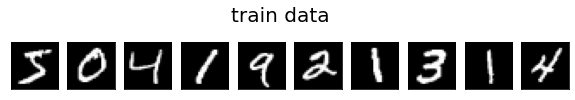

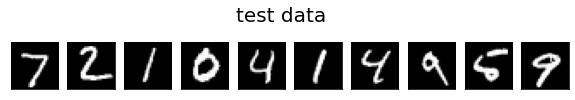

In [ ]:
show_data(X_train, title="train data")
show_data(X_test, title="test data")

In [ ]:
input_dim, output_dim = 784, 784
encode_dim = 100
hidden_dim = 256

In [ ]:
# encoder
input_layer = Input(shape=(input_dim,), name="INPUT")
hidden_layer_1 = Dense(hidden_dim, activation='relu', name="HIDDEN_1")(input_layer)

# code
code_layer = Dense(encode_dim, activation='relu', name="CODE")(hidden_layer_1)

# decoder
hidden_layer_2 = Dense(hidden_dim, activation='relu', name="HIDDEN_2")(code_layer)
output_layer = Dense(output_dim, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

In [ ]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='binary_crossentropy')
AE.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
CODE (Dense)                 (None, 100)               25700     
_________________________________________________________________
HIDDEN_2 (Dense)             (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AE.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1606
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0819
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0765
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0740
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0725
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0714
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0709
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0703
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0698
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0694


In [ ]:
decoded_data = AE.predict(X_test)

In [ ]:
get_encoded_data = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

In [ ]:
encoded_data = get_encoded_data.predict(X_test)

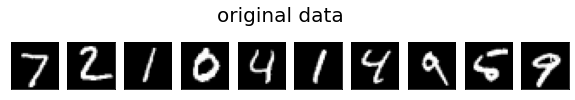

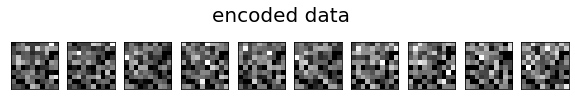

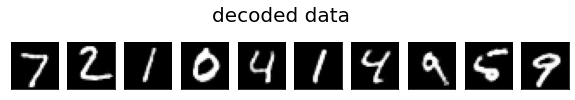

In [ ]:
show_data(X_test, title="original data")
show_data(encoded_data, height=10, width=10, title="encoded data")
show_data(decoded_data, title="decoded data")

In [ ]:
from math import log10, sqrt 
import cv2 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  

original = X_test[0] 
compressed = decoded_data[0]
value = PSNR(original, compressed) 
print(f"PSNR value is {value} dB") 

PSNR value is 76.64459297770605 dB
